In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [20,10]
def set_font(s, reset=False):
    if reset:
        plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams["figure.figsize"] = [20,10]
#     plt.rcParams['font.family'] = 'serif'
#     plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    plt.rc('font', size=s)          # controls default text sizes
    plt.rc('axes', titlesize=s)     # fontsize of the axes title
    plt.rc('axes', labelsize=s)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=s-2)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=s-2)    # fontsize of the tick labels
    plt.rc('legend', fontsize=s)    # legend fontsize
    plt.rc('figure', titlesize=s)  # fontsize of the figure title
set_font(20)

# Experiment I. Heirarchical

In [16]:
# Construct test case with Sale BPs with different tax rates
def generate_sales_df(N=2, taxes=[0.02, 0.15, 0.35]):
    if taxes is not None:
        tax_rates = taxes
    if N is not None:
        N = N
    cur_id = 0
    data = pd.DataFrame(columns=["ID", "FA_Name", "Journal", "Date", "Debit", "Credit"])
    for tax in tax_rates:
        for _ in range(N):
            #generate amounts
            rev = random.randint(10,1000)
            t = rev*tax+random.randint(1, 3)
            tr = rev+t
            data = data.append([pd.Series([cur_id, "Revenue", "Sales ledger", "01/01/2017", 0.0, rev], index=data.columns), 
                        pd.Series([cur_id, "Tax", "Sales ledger", "01/01/2017", 0.0, t], index=data.columns), 
                        pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                        , ignore_index=True)
            cur_id+=1
    return data
generated_data = generate_sales_df()

In [19]:
generated_data

,ID,Signature,FA_Name,Debit,Credit,from
0,0,"([('Revenue', 0.97794), ('Tax', 0.02206)], [('...",Revenue,0.0,0.977937,True
1,0,"([('Revenue', 0.97794), ('Tax', 0.02206)], [('...",Tax,0.0,0.022063,True
2,0,"([('Revenue', 0.97794), ('Tax', 0.02206)], [('...",Trade Receivables,1.0,0.000000,False
3,1,"([('Revenue', 0.9671), ('Tax', 0.0329)], [('Tr...",Revenue,0.0,0.967101,True
4,1,"([('Revenue', 0.9671), ('Tax', 0.0329)], [('Tr...",Tax,0.0,0.032899,True
5,1,"([('Revenue', 0.9671), ('Tax', 0.0329)], [('Tr...",Trade Receivables,1.0,0.000000,False
6,2,"([('Revenue', 0.86728), ('Tax', 0.13272)], [('...",Revenue,0.0,0.867276,True
7,2,"([('Revenue', 0.86728), ('Tax', 0.13272)], [('...",Tax,0.0,0.132724,True
8,2,"([('Revenue', 0.86728), ('Tax', 0.13272)], [('...",Trade Receivables,1.0,0.000000,False
9,3,"([('Revenue', 0.86664), ('Tax', 0.13336)], [('...",Revenue,0.0,0.866639,True


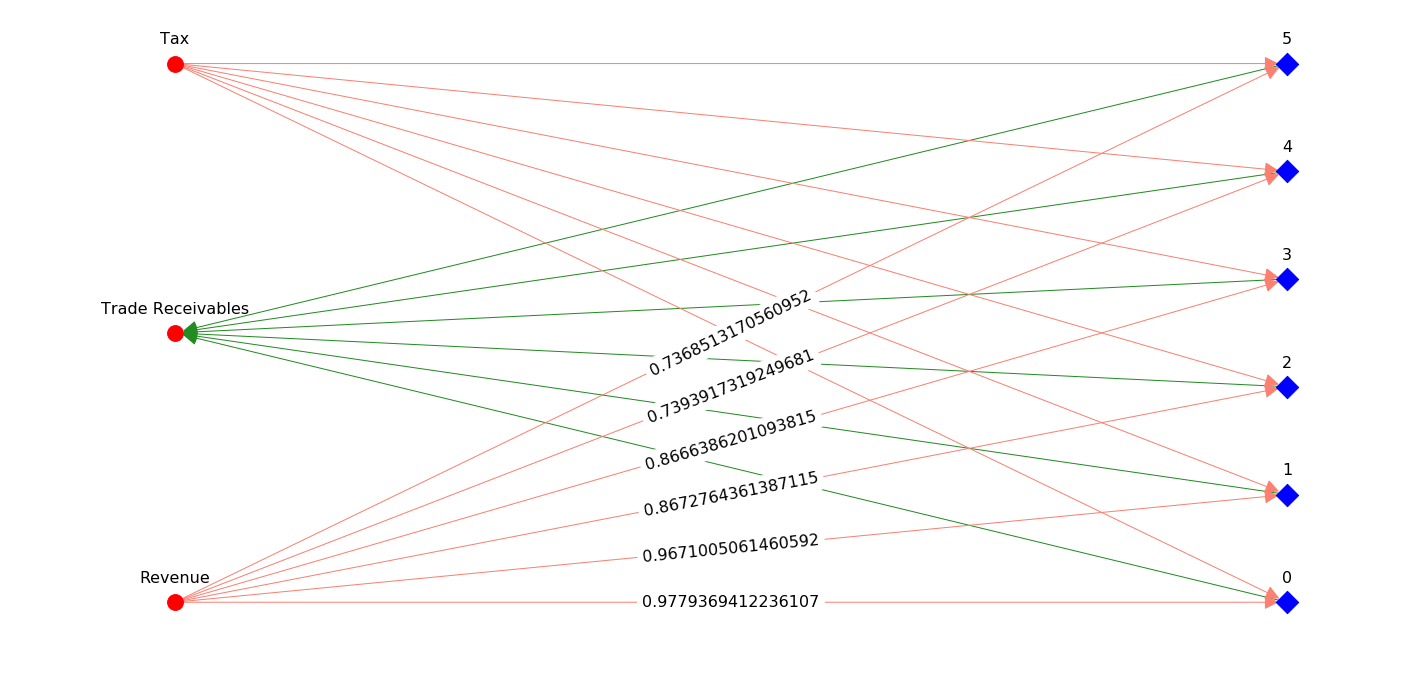

In [17]:
from NetEmbs.DataProcessing import *
from NetEmbs.FSN.graph import FSN
generated_data = prepare_data(generated_data)
fsn = FSN()
fsn.build(generated_data, name_column="FA_Name")
fsn.nodes()
from NetEmbs.Vis.plots import plotFSN
plotFSN(fsn, edge_labels="Revenue", node_labels=True, title="Proof_1")

In [5]:
import seaborn as sns
from collections import Counter
def plot_heatmap(pairs, title="HeatMap", size=6, norm="col", return_hm=False, absolute_vals = False, debug=False):
    cnt = dict(Counter(pairs))
    heatmap_data = np.zeros((size,size))
    if debug:
        print(cnt)
    for key, item in cnt.items():
        heatmap_data[key] = item
    if norm=="row":
        if not absolute_vals:
            heatmap_data = preprocessing.normalize(heatmap_data, axis=1, norm="l1")
        sns.heatmap(heatmap_data, annot=True, cmap="Blues")
    elif norm=="col":
        if not absolute_vals:
            heatmap_data = preprocessing.normalize(heatmap_data, axis=0, norm="l1")
        mask = np.zeros_like(heatmap_data)
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(heatmap_data, mask=mask, annot=True, cmap="Blues")
    if title is not None and isinstance(title, str):
        plt.tight_layout()
        plt.savefig("img/"+title, dpi=140, pad_inches=0.01)
    plt.show()
    if return_hm:
        return heatmap_data

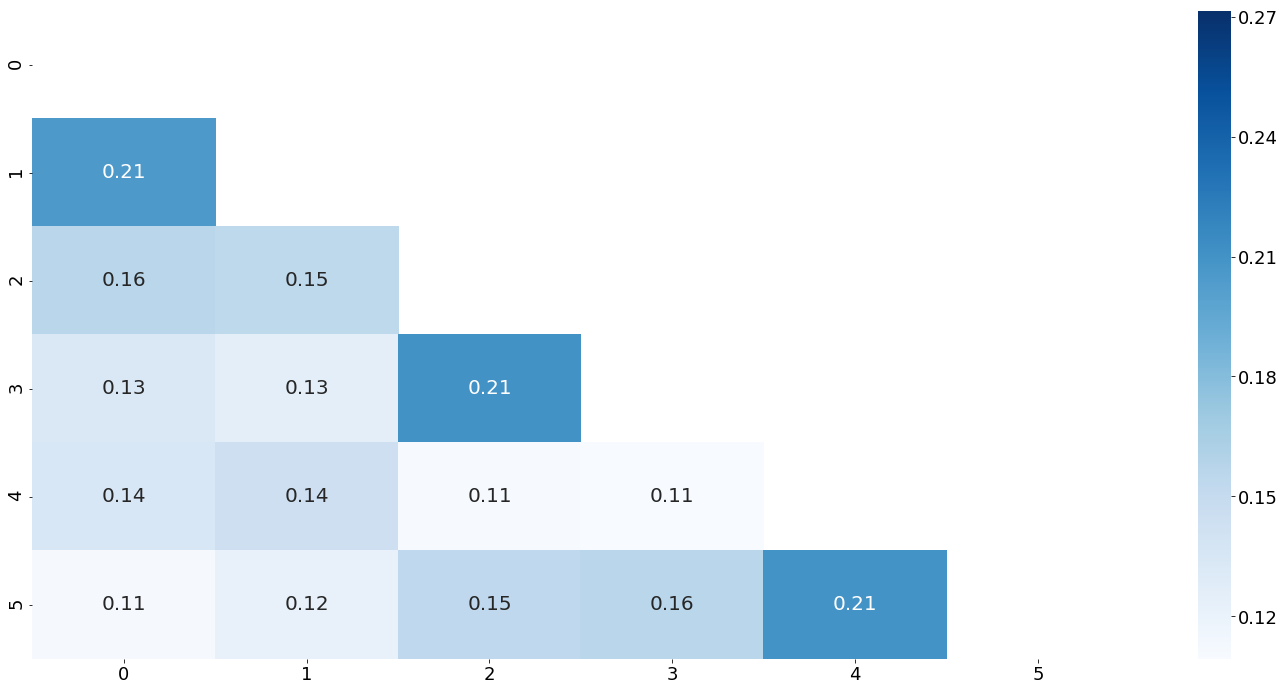

In [18]:
from NetEmbs.FSN.utils import *
from NetEmbs.Vis.plots import plotHeatMap
pairs = [make_pairs(randomWalk(fsn, node, 10, direction="COMBI")) for _ in range(20) for node in range(6)]
pairs = [item for sublist in pairs for item in sublist]
plotHeatMap(pairs, norm="col", title="Heat_1")

# Experiment B. Noisy BPs

In [3]:
# Construct test case with Sale BPs with noise financial accounts (with very small monetary flow)
def generate_noisy_df(N=2, noise_ratio=0.1):
    if N is not None:
        N = N
    cur_id = 0
    data = pd.DataFrame(columns=["ID", "FA_Name", "Journal", "Date", "Debit", "Credit"])
    for it in range(N):
            rev = random.randint(10,1000)
            if it//(N-3)==0:
#             if random.random()>noise_ratio:
                #generate amounts
                t = rev*0.1
                tr = rev+t
                data = data.append([pd.Series([cur_id, "Revenue", "Sales ledger", "01/01/2017", 0.0, rev], index=data.columns), 
                        pd.Series([cur_id, "Tax", "Sales ledger", "01/01/2017", 0.0, t], index=data.columns), 
                        pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                        , ignore_index=True)
            else:
                #generate amounts
                t = rev*0.08
                noise = rev*0.02
                right_noise1 = random.randint(5,int(rev/30))
                right_noise2 = random.randint(5,int(rev/30))
                tr = rev+t+noise-right_noise1-right_noise2
                data = data.append([pd.Series([cur_id, "Revenue", "Sales ledger", "01/01/2017", 0.0, rev], index=data.columns), 
                            pd.Series([cur_id, "Tax", "Sales ledger", "01/01/2017", 0.0, t], index=data.columns), 
                            pd.Series([cur_id, "W", "Sales ledger", "01/01/2017", 0.0, noise], index=data.columns), 
                            pd.Series([cur_id, "Z", "Sales ledger", "01/01/2017", right_noise1, 0.0], index=data.columns),
                            pd.Series([cur_id, "X", "Sales ledger", "01/01/2017", right_noise2, 0.0], index=data.columns),
                            pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                            , ignore_index=True)
            cur_id+=1
    return data

In [4]:
generated_data2 = generate_noisy_df(10)
generated_data2.head(20)

,ID,FA_Name,Journal,Date,Debit,Credit
0,0,Revenue,Sales ledger,01/01/2017,0.0,46.0
1,0,Tax,Sales ledger,01/01/2017,0.0,4.6
2,0,Trade Receivables,Sales ledger,01/01/2017,50.6,0.0
3,1,Revenue,Sales ledger,01/01/2017,0.0,254.0
4,1,Tax,Sales ledger,01/01/2017,0.0,25.4
5,1,Trade Receivables,Sales ledger,01/01/2017,279.4,0.0
6,2,Revenue,Sales ledger,01/01/2017,0.0,195.0
7,2,Tax,Sales ledger,01/01/2017,0.0,19.5
8,2,Trade Receivables,Sales ledger,01/01/2017,214.5,0.0
9,3,Revenue,Sales ledger,01/01/2017,0.0,11.0


In [10]:
from NetEmbs.DataProcessing import *
from NetEmbs.FSN.graph import FSN
# generated_data2 = prepare_data(generated_data2, unique=False)
# fsn = FSN()
# fsn.build(generated_data2, name_column="FA_Name")
# fsn.nodes()
def plotFSN(fsn, colors=("Red", "Blue"), edge_labels=False, node_labels=True, title=None, text_size=16):
    """
    Plot FSN with matplotlib library
    :param fsn: FSN to be visualize
    :param colors: array of colors for FA and BP respectively
    :param edge_labels: True: Show the weights of edges, False: Without the weights of edges, string "NodeName" - only part of edges from that NodeName
    :param title: Title for file to be saved in /img folder. None: no savings
    """
    left = fsn.get_FA()
    pos = nx.bipartite_layout(fsn, left)
    arc_weight = nx.get_edge_attributes(fsn, 'weight')
    node_col = [colors[d['bipartite']] for n, d in fsn.nodes(data=True)]
    BPs = [node for node, d in fsn.nodes(data=True) if d["bipartite"] == 0]
    FAs = [node for node, d in fsn.nodes(data=True) if d["bipartite"] == 1]
    nx.draw_networkx_nodes(fsn, pos, nodelist=BPs, node_shape="D", node_color=colors[1], with_labels=False,
                           node_size=250)
    nx.draw_networkx_nodes(fsn, pos, nodelist=FAs, node_color=colors[0], with_labels=False, node_size=250)
    #     nx.draw_networkx_nodes(fsn, pos, node_color=node_col, with_labels=False, node_size=250)
    debit = {(u, v) for u, v, d in fsn.edges(data=True) if d['type'] == "DEBIT"}
    credit = {(u, v) for u, v, d in fsn.edges(data=True) if d['type'] == "CREDIT"}
    nx.draw_networkx_edges(fsn, pos, edgelist=debit, edge_color="forestgreen", arrowsize=30)
    nx.draw_networkx_edges(fsn, pos, edgelist=credit, edge_color="salmon", arrowsize=30)
    if isinstance(edge_labels, list):
        lbls = {(u, v) for u, v, d in fsn.edges(data=True) if u in edge_labels}
        wei = {item: arc_weight[item] for item in lbls}
        nx.draw_networkx_edge_labels(fsn, pos, node_size=250, edge_labels=wei, font_size=16)
    if edge_labels and isinstance(edge_labels, bool):
        nx.draw_networkx_edge_labels(fsn, pos, node_size=250, edge_labels=arc_weight, font_size=16)
    if node_labels:
        #     TODO add relative align for labels
        label_pos = pos.copy()
        for p in label_pos:  # raise text positions
            label_pos[p][1] += 0.05
        nx.draw_networkx_labels(fsn, label_pos, font_size=text_size)
    ax = plt.gca()
    ax.set_axis_off()
    if title is not None and isinstance(title, str):
        plt.tight_layout()
        plt.savefig("img/" + title, dpi=140, pad_inches=0.01)
    plt.show()
# plotFSN(fsn, edge_labels=["X", "Z", "W"], node_labels=True, title="Proof_2")

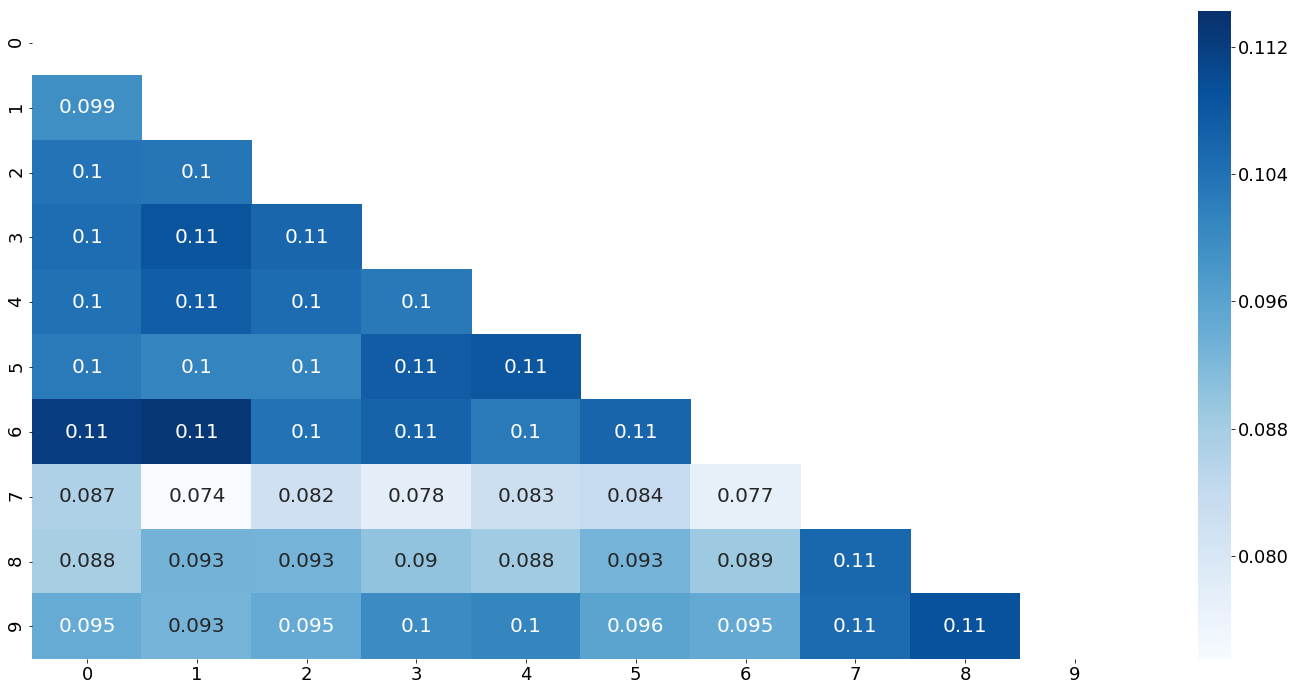

In [6]:
from NetEmbs.FSN.utils import *
from NetEmbs.Vis.plots import plotHeatMap
pairs = [make_pairs(randomWalk(fsn, node, 100, direction="COMBI")) for _ in range(20) for node in range(9)]
pairs = [item for sublist in pairs for item in sublist]
plotHeatMap(pairs, norm="col", title="Heat_2", size=10)

# Experiment C. Multiple core processes

In [7]:
# Construct test case with Sale BPs with different tax rates
def generate_complex_df(N=2, taxes=[0.06, 0.25], noise=[1]):
    if taxes is not None:
        tax_rates = taxes
    if N is not None:
        N = N
    cur_id = 0
    data = pd.DataFrame(columns=["ID", "FA_Name", "Journal", "Date", "Debit", "Credit"])
    for tax in tax_rates:
        for _ in range(N):
            #generate amounts
            rev = random.randint(10,1000)
            if 1 in noise:
                t = rev*tax+random.randint(2, 10)
            else:
                t = rev*tax
            if not 2 in noise:
                tr = rev+t
                data = data.append([pd.Series([cur_id, "Revenue", "Sales ledger", "01/01/2017", 0.0, rev], index=data.columns), 
                            pd.Series([cur_id, "Tax", "Sales ledger", "01/01/2017", 0.0, t], index=data.columns), 
                            pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                            , ignore_index=True)
                cur_id+=1
                data = data.append([ pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", 0.0, tr], index=data.columns),
                            pd.Series([cur_id, "Cash", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                            , ignore_index=True)
                cur_id+=1
            else:
                left_noise = random.randint(5,int(rev/30))
                right_noise = random.randint(5,int(rev/30))
                tr = rev+t+left_noise-right_noise
                data = data.append([pd.Series([cur_id, "Revenue", "Sales ledger", "01/01/2017", 0.0, rev], index=data.columns), 
                            pd.Series([cur_id, "Tax", "Sales ledger", "01/01/2017", 0.0, t], index=data.columns), 
                            pd.Series([cur_id, "LeftNoise", "Sales ledger", "01/01/2017", 0.0, left_noise], index=data.columns),
                            pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns),
                            pd.Series([cur_id, "RightNoise", "Sales ledger", "01/01/2017", right_noise, 0.0], index=data.columns)]
                            , ignore_index=True)
                cur_id+=1
                data = data.append([ pd.Series([cur_id, "Trade Receivables", "Sales ledger", "01/01/2017", 0.0, tr], index=data.columns),
                            pd.Series([cur_id, "Cash", "Sales ledger", "01/01/2017", tr, 0.0], index=data.columns)]
                            , ignore_index=True)
                cur_id+=1
    return data

In [8]:
generated_data3 = generate_complex_df(noise=[2])
generated_data3.head(30)

,ID,FA_Name,Journal,Date,Debit,Credit
0,0,Revenue,Sales ledger,01/01/2017,0.00,913.00
1,0,Tax,Sales ledger,01/01/2017,0.00,54.78
2,0,LeftNoise,Sales ledger,01/01/2017,0.00,17.00
3,0,Trade Receivables,Sales ledger,01/01/2017,961.78,0.00
4,0,RightNoise,Sales ledger,01/01/2017,23.00,0.00
5,1,Trade Receivables,Sales ledger,01/01/2017,0.00,961.78
6,1,Cash,Sales ledger,01/01/2017,961.78,0.00
7,2,Revenue,Sales ledger,01/01/2017,0.00,260.00
8,2,Tax,Sales ledger,01/01/2017,0.00,15.60
9,2,LeftNoise,Sales ledger,01/01/2017,0.00,7.00


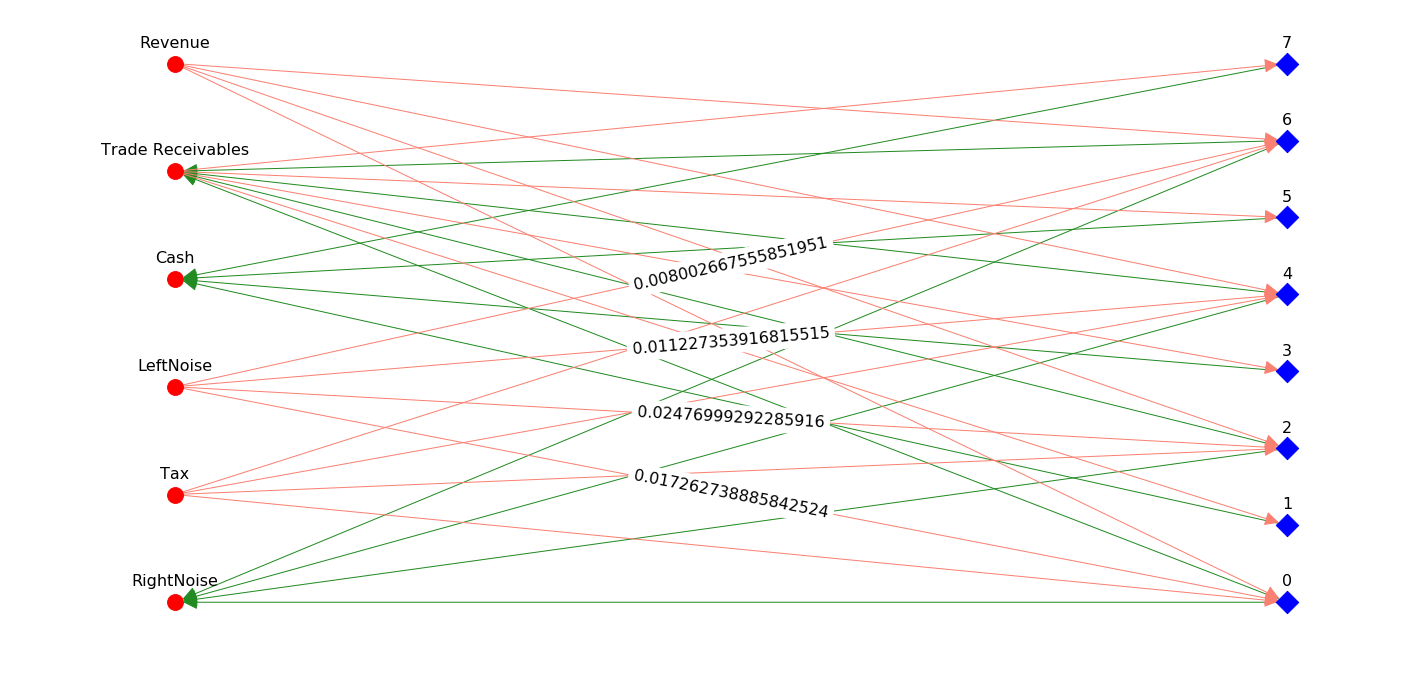

In [11]:
from NetEmbs.DataProcessing import *
from NetEmbs.FSN.graph import FSN
generated_data3 = prepare_data(generated_data3, unique=False)
fsn = FSN()
fsn.build(generated_data3, name_column="FA_Name")
fsn.nodes()
plotFSN(fsn, edge_labels=["LeftNoise"], node_labels=True, title="Proof_3_")

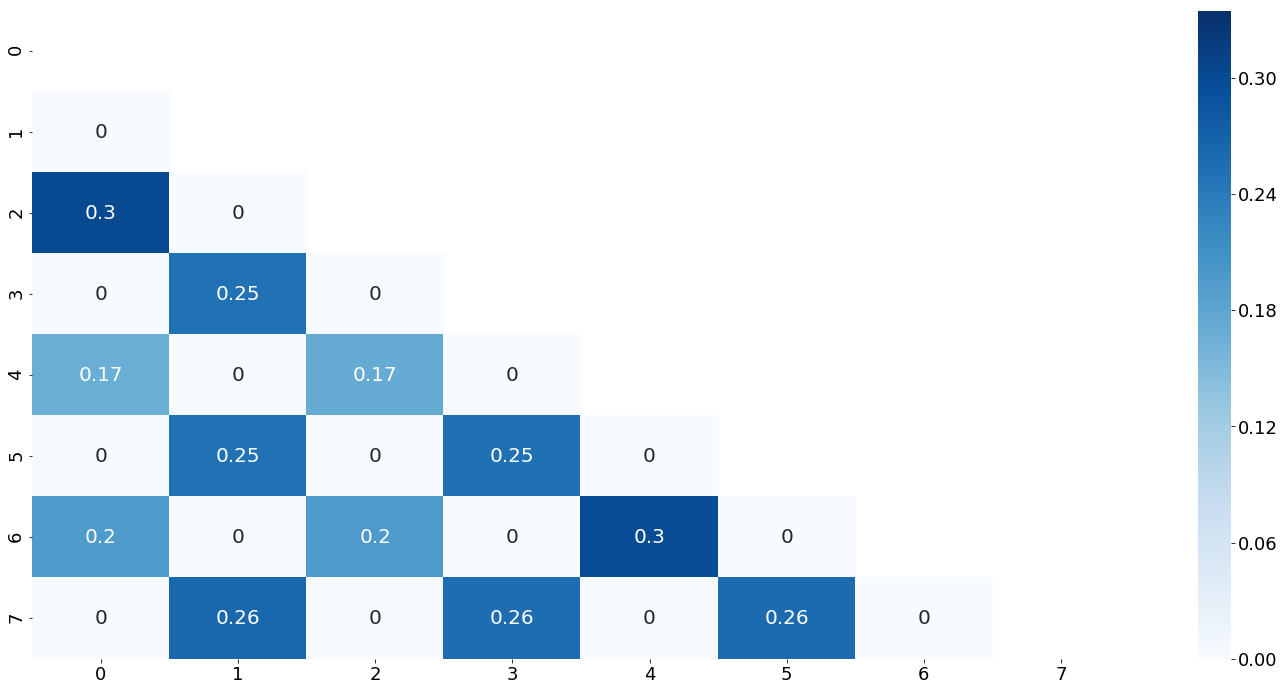

In [12]:
from NetEmbs.FSN.utils import *
from NetEmbs.Vis.plots import plotHeatMap
pairs = [make_pairs(randomWalk(fsn, node, 200, direction="COMBI")) for _ in range(20) for node in range(8)]
pairs = [item for sublist in pairs for item in sublist]
plotHeatMap(pairs, norm="col", title="Heat_3", size=8)